<a href="https://colab.research.google.com/github/yeabwang/ML_zoom_camp/blob/main/car_fuel_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

In [2]:
!wget $data

--2025-10-08 06:16:59--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.04s   

2025-10-08 06:17:00 (18.6 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [5]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [64]:
features = ["engine_displacement", "horsepower", "vehicle_weight", "model_year", "fuel_efficiency_mpg"]
df = df[features]

df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

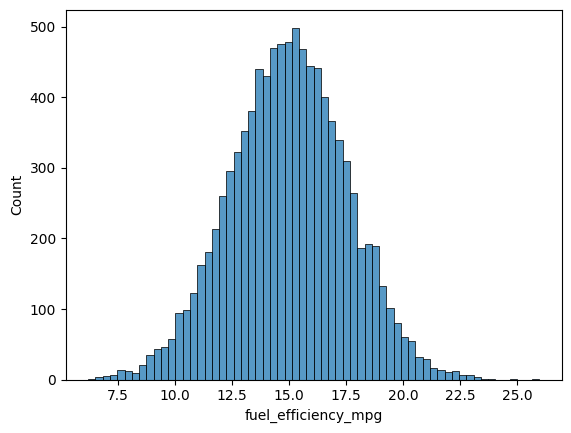

In [65]:
sns.histplot(df["fuel_efficiency_mpg"])

In [66]:
df.isnull().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


In [67]:
df["horsepower"].median()

149.0

<Axes: xlabel='horsepower', ylabel='Count'>

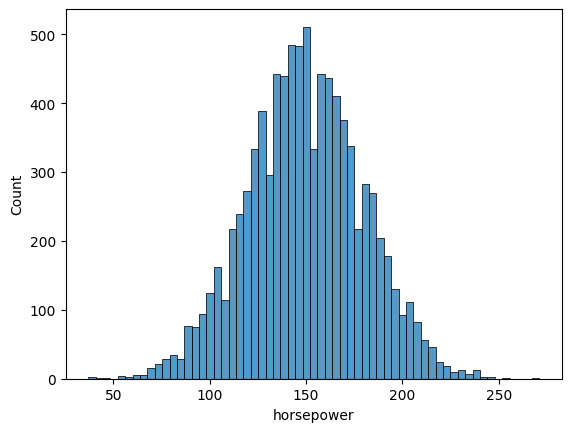

In [68]:
sns.histplot(df["horsepower"])

In [69]:
# df["horsepower"] = df["horsepower"].fillna(df["horsepower"].mean())
df["horsepower"] = df["horsepower"].fillna(0)

<Axes: xlabel='horsepower', ylabel='Count'>

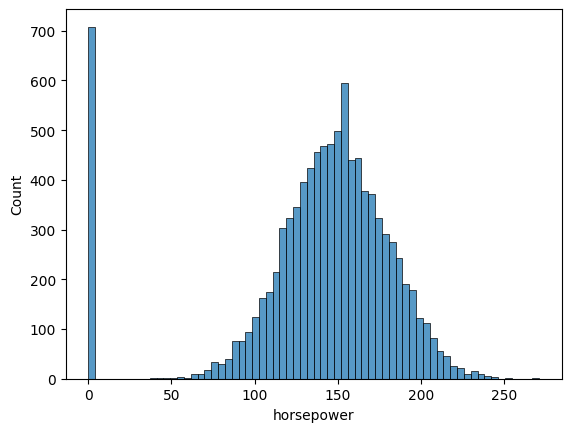

In [70]:
sns.histplot(df["horsepower"])

In [15]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [71]:
whole_y = df["fuel_efficiency_mpg"]
del df["fuel_efficiency_mpg"]

In [72]:
def train_linear(x, y):
  ones = np.ones(x.shape[0])
  x = np.column_stack([ones, x])
  xtx = x.T.dot(x)
  xtx_inv = np.linalg.inv(xtx)
  w_full = xtx_inv.dot(x.T).dot(y)

  return  w_full[0], w_full[1:]

In [73]:
def rmse(y, y_pred):
  sm = (y-y_pred) ** 2
  mse = sm.mean()
  return np.sqrt(mse)

In [81]:
def prepare_ds(ds, ys):
    n = len(ds)
    train_n = int(n * 0.6)
    val_n = int(n * 0.2)

    train_ds = ds[:train_n]
    val_ds = ds[train_n:train_n + val_n]
    test_ds = ds[train_n + val_n:]

    train_y = ys[:train_n]
    val_y = ys[train_n:train_n + val_n]
    test_y = ys[train_n + val_n:]

    return train_ds, val_ds, train_y, val_y


In [89]:
def prepare_ds_for_test(ds, ys):
    n = len(ds)
    train_n = int(n * 0.6)
    val_n = int(n * 0.2)

    train_ds = ds[:train_n]
    val_ds = ds[train_n:train_n + val_n]
    test_ds = ds[train_n + val_n:]

    train_y = ys[:train_n]
    val_y = ys[train_n:train_n + val_n]
    test_y = ys[train_n + val_n:]

    whole_ds = pd.concat([train_ds, val_ds], ignore_index=True)
    whole_y = np.concatenate([train_y, val_y])

    return whole_ds, whole_y, test_ds, test_y


In [78]:
def test_model(w0, val_ds, val_y):
  y_pred_v = w0 + val_ds.dot(wi)
  score_v = rmse(val_y, y_pred_v)
  print(f"On Val RMSE score {score_v}")
  return score_v

In [82]:
all_seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
all_rmse = {}

for s_seed in all_seeds:
    df_shuffled = df.sample(frac=1, random_state=s_seed).reset_index(drop=True)
    ys_shuffled = whole_y[df_shuffled.index]
    train_ds, val_ds, train_y, val_y = prepare_ds(df_shuffled, ys_shuffled)
    w0, wi = train_linear(train_ds, train_y)
    test_value = test_model(w0, val_ds, val_y)
    all_rmse[f"df_{s_seed}"] = test_value

print(all_rmse)
standard = np.std(list(all_rmse.values()))
round(standard, 3)


On Val RMSE score 2.520359050026965
On Val RMSE score 2.518377023911546
On Val RMSE score 2.5153185626763688
On Val RMSE score 2.51691501445612
On Val RMSE score 2.516569373823622
On Val RMSE score 2.51636171954323
On Val RMSE score 2.519477968565805
On Val RMSE score 2.520350262878001
On Val RMSE score 2.5191677224401863
On Val RMSE score 2.5178887186578014
{'df_0': np.float64(2.520359050026965), 'df_1': np.float64(2.518377023911546), 'df_2': np.float64(2.5153185626763688), 'df_3': np.float64(2.51691501445612), 'df_4': np.float64(2.516569373823622), 'df_5': np.float64(2.51636171954323), 'df_6': np.float64(2.519477968565805), 'df_7': np.float64(2.520350262878001), 'df_8': np.float64(2.5191677224401863), 'df_9': np.float64(2.5178887186578014)}


np.float64(0.002)

In [83]:
def train_with_r2(x, y, r = 0.001):
  ones = np.ones(x.shape[0])
  x = np.column_stack([ones, x])

  xtx = x.T.dot(x)
  xtx += r * np.eye(xtx.shape[0])

  xtx_inv = np.linalg.inv(xtx)
  w_full = xtx_inv.dot(x.T).dot(y)

  return w_full[0], w_full[1:]

In [90]:
all_seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
all_rmse = {}

for s_seed in all_seeds:
    df_shuffled = df.sample(frac=1, random_state=s_seed).reset_index(drop=True)
    ys_shuffled = whole_y[df_shuffled.index]
    whole_ds, whole_com_y, test_ds, test_y = prepare_ds_for_test(df_shuffled, ys_shuffled)
    w0, wi = train_with_r2(whole_ds, whole_com_y, r=0.001)
    test_value = test_model(w0, test_ds, test_y)
    all_rmse[f"df_{s_seed}"] = test_value

print(all_rmse)
# standard = np.std(list(all_rmse.values()))
# round(standard, 3)


On Val RMSE score 2.5937401262376882
On Val RMSE score 2.5955997846805037
On Val RMSE score 2.600639314996987
On Val RMSE score 2.5956039377865565
On Val RMSE score 2.5956666369566666
On Val RMSE score 2.5949562469175573
On Val RMSE score 2.595715115972649
On Val RMSE score 2.5953106353088895
On Val RMSE score 2.5958318679872194
On Val RMSE score 2.5959789267361253
{'df_0': np.float64(2.5937401262376882), 'df_1': np.float64(2.5955997846805037), 'df_2': np.float64(2.600639314996987), 'df_3': np.float64(2.5956039377865565), 'df_4': np.float64(2.5956666369566666), 'df_5': np.float64(2.5949562469175573), 'df_6': np.float64(2.595715115972649), 'df_7': np.float64(2.5953106353088895), 'df_8': np.float64(2.5958318679872194), 'df_9': np.float64(2.5959789267361253)}


In [17]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006


In [18]:
whole_y

,fuel_efficiency_mpg
0,16.642943
1,16.298377
2,18.591822
3,11.818843
4,19.402209
...,...
9699,19.961672
9700,14.651056
9701,18.404435
9702,20.502460


In [19]:
n = len(df)
train_n = int(n * 0.6)
val_n = int(n*0.2)
test_n = n - val_n - train_n

In [20]:
train_ds = df[:train_n]
val_ds = df[train_n:train_n + val_n]
test_ds = df[train_n+val_n:]

train_y = whole_y[:train_n]
val_y = whole_y[train_n:train_n + val_n]
test_y = whole_y[train_n+val_n:]

In [ ]:
# Fill null with mean

In [33]:
def train_with_r2(x, y, r = 0.001):
  ones = np.ones(x.shape[0])
  x = np.column_stack([ones, x])

  xtx = x.T.dot(x)
  xtx += r * np.eye(xtx.shape[0])

  xtx_inv = np.linalg.inv(xtx)
  w_full = xtx_inv.dot(x.T).dot(y)

  return w_full[0], w_full[1:]

In [31]:
w0, wi = train_linear(train_ds, train_y)
y_pred_t = w0 + train_ds.dot(wi)
score = rmse(train_y, y_pred_t)
print(f"On training RMSE score {score}")

y_pred_v = w0 + val_ds.dot(wi)
score_v = rmse(val_y, y_pred_v)
print(f"On Val RMSE score {score_v}")

On training RMSE score 0.5203457641474559
On Val RMSE score 0.5171866956567477


In [36]:
for r in 0, 0.01, 0.1, 1, 5, 10, 100:
    w0, w = train_with_r2(train_ds, train_y, r=r)
    y_pred = w0 + val_ds.dot(w)
    score = rmse(val_y, y_pred)
    print(f"r={r:7.5f}, RMSE={score:.4f}")

r=0.00000, RMSE=0.5172
r=0.01000, RMSE=0.5169
r=0.10000, RMSE=0.5186
r=1.00000, RMSE=0.5221
r=5.00000, RMSE=0.5228
r=10.00000, RMSE=0.5229
r=100.00000, RMSE=0.5230
